# Title of the project: **Customer Churn Prediction**

 * Brief tagline: *Predicting customer churn to help businesses retain users*

## step 1: Introduction
    *  Problem Statement: Explain what customer churn is and why predicting it is important.
    *  Example: "Churn refers to customers leaving a service. Reducing churn improves customer retention and revenue."
    *  Objective: Clearly state the goal, e.g., "Develop a machine learning model to predict customer churn using historical data."
    *  Dataset Overview: Mention the number of rows, columns, and key features (e.g., Age, Gender, Geography, Exited).

## Step 2: Load and Understand the Dataset

In [1]:
# Import Libraries:
import pandas as pd
import numpy as np

In [3]:
# Load Data:
data = pd.read_csv(r"C:\Machine Learning\codesoft\Bank Customer Churn Prediction_ML_3\Churn_Modelling.csv")

In [5]:
# Examine the Data:
print(data.info())
print("**"* 56)
print(data.columns)
print("**"* 56)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
*****************************************************************************************

In [7]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## Step 3: Exploratory Data Analysis (EDA)

In [9]:
# Handle Missing Values (if any):
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Visualize Data:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

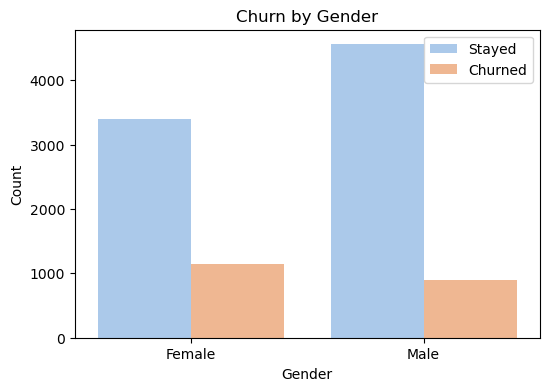

In [13]:
# Bar Plot
# Example: Gender Distribution of Churn
# Plot churn rates by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Exited', palette='pastel')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Stayed', 'Churned'])
plt.show()

##### Insight: I notice that  female gender has a higher churn rate, which could inform tailored strategies.

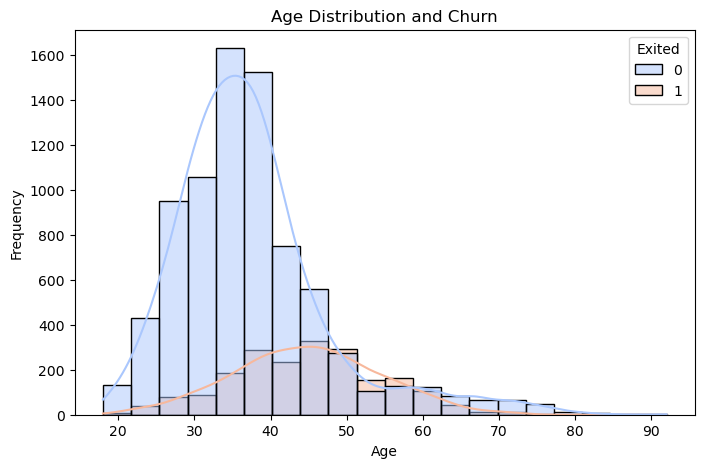

In [15]:
# Histogram
# Example: Age Distribution of Customers
# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', hue='Exited', kde=True, palette='coolwarm', bins=20)
plt.title('Age Distribution and Churn')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Insight: The histogram indicates that customers aged 40–50 have a higher likelihood of churn, with approximately 200 customers exiting. Conversely, customers aged 32–38 show a significantly lower churn rate, with a high frequency of 1200–1300 customers remaining loyal.

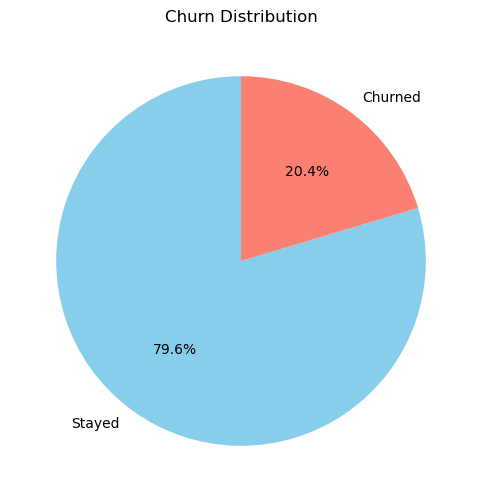

In [17]:
# Pie Chart
# Example: Overall Churn Rate
# Calculate churn distribution
churn_counts = data['Exited'].value_counts()
labels = ['Stayed', 'Churned']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.show()

##### Insight: The pie chart shows that 79.6% of customers stayed with the service, while 20.4% churned. This highlights that although the majority of customers are retained, addressing the 20.4% churn rate could significantly improve business outcomes.

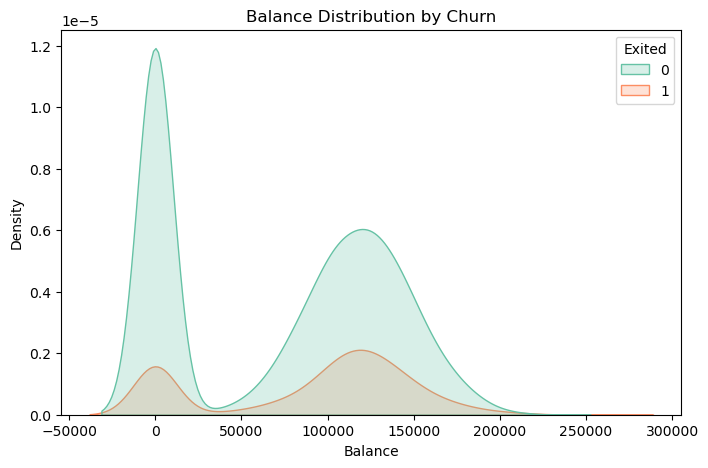

In [19]:
# Highlight Trends
# Example: Balance Distribution by Churn
# Plot balance distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='Balance', hue='Exited', fill=True, palette='Set2')
plt.title('Balance Distribution by Churn')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()
# Insight: Identify if customers with lower or higher balances are more likely to churn.

## Step 4: Data Preprocessing

In [21]:
# Drop Irrelevant Columns: Remove columns like RowNumber, CustomerId, and Surname as they don't contribute to predictions.
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(data.head(2))

   CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  


In [23]:
# Handle Categorical Variables: Convert Geography and Gender to numerical using one-hot encoding or label encoding.
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
print(data.head(3))

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  


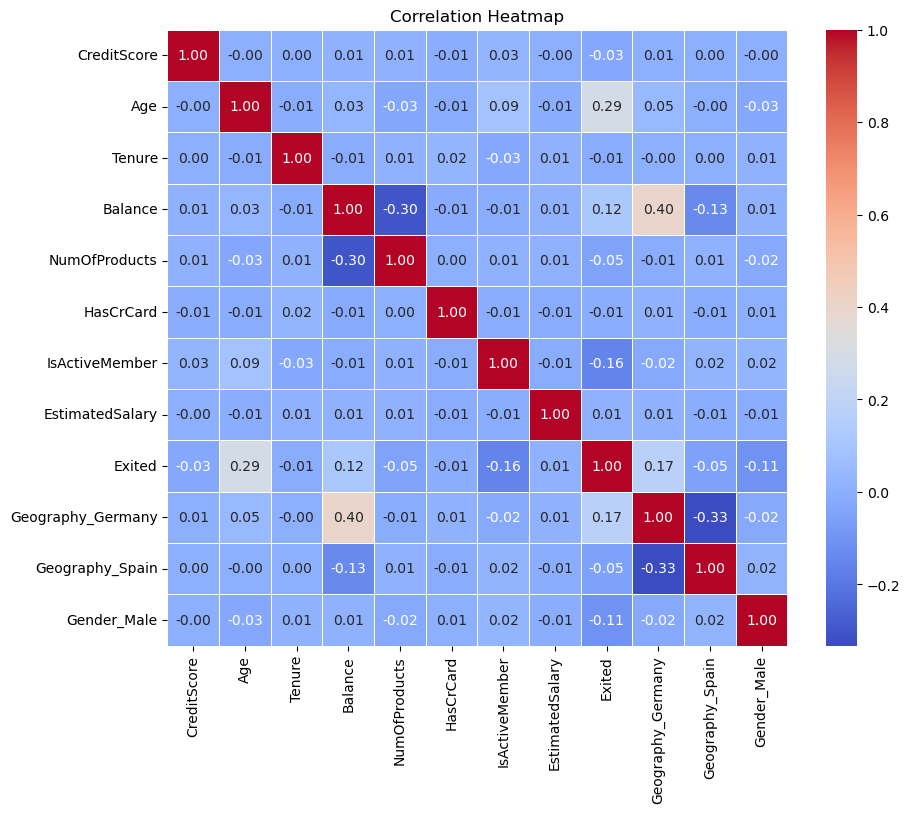

In [25]:
# Advanced Visualization
# Example: Correlation Heatmap
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### Insight: Understand relationships between features and the target (Exited).

In [27]:
# Feature Scaling: Scale numerical features (CreditScore, Age, etc.) using StandardScaler or MinMaxScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

## Step 5: Split Data
   * Divide the data into training and testing sets.

In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Exited', axis=1)  # Drop the target column 'Exited' to create features
y = data['Exited']              # Target variable is 'Exited'

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Why Split the Data?**
* Prevent Overfitting: Ensures the model isn't overly tuned to the training data.
* Evaluate Generalization: Helps test the model's performance on unseen data.

## Step 6: Model Training
  * Train models like Logistic Regression, Random Forest, or Gradient Boosting.

## 1.LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance
Accuracy: 0.8115
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## 2.RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance
Accuracy: 0.867
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## 3.Gradient Boosting

In [43]:
from xgboost import XGBClassifier

# Initialize and train the model
gradient_boost = XGBClassifier(random_state=42)
gradient_boost.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gradient_boost.predict(X_test)

# Evaluate
print("Gradient Boosting Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Performance
Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



### **Compare Performance**
  * Create a comparison table or summary of model metrics (`Accuracy`, `Precision`, `Recall`, `F1-Score`) for easier evaluation.

In [45]:
# Gather metrics
results = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ]
}

# Convert to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression    0.8115
1        Random Forest    0.8670
2    Gradient Boosting    0.8640


## Step 7: Model Evaluation

## Visualize Results
Confusion Matrix for Each Model

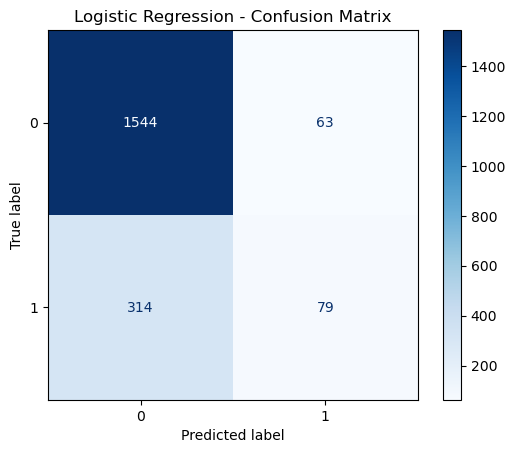

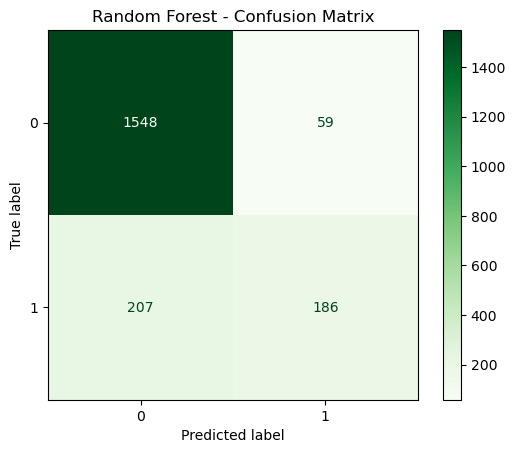

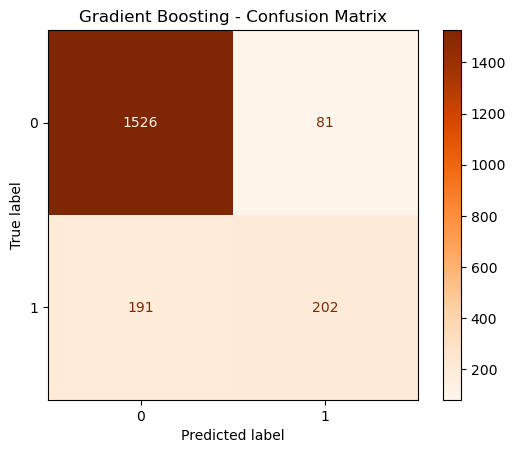

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# Random Forest
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Gradient Boosting
ConfusionMatrixDisplay.from_estimator(gradient_boost, X_test, y_test, cmap='Oranges')
plt.title('Gradient Boosting - Confusion Matrix')
plt.show()

## Step 8: Save the Model

In [59]:
import joblib
import os

# Path to save the model
save_path = r"C:\Machine Learning\codesoft\Bank Customer Churn Prediction_ML_3"
os.makedirs(save_path, exist_ok=True)  # Ensure the directory exists

# Save the Random Forest model
rf_model_filename = os.path.join(save_path, "random_forest_model.pkl")
joblib.dump(random_forest, rf_model_filename)
print(f"Random Forest model saved to {rf_model_filename}")

Random Forest model saved to C:\Machine Learning\codesoft\Bank Customer Churn Prediction_ML_3\random_forest_model.pkl


In [69]:
import joblib

# Path to the saved Random Forest model
rf_model_filename = r"C:\Machine Learning\codesoft\Bank Customer Churn Prediction_ML_3\random_forest_model.pkl"

# Load the model
loaded_rf_model = joblib.load(rf_model_filename)
print("Random Forest model loaded successfully!")

# Example prediction (assuming you have test data X_test)
y_pred_rf_loaded = loaded_rf_model.predict(X_test)

# Print the predictions
print("Predictions for the test data:", y_pred_rf_loaded)

Random Forest model loaded successfully!
Predictions for the test data: [0 0 0 ... 1 0 0]


## Step 9: **Conclusion**:
The *Random Forest model* outperforms both Logistic Regression and Gradient Boosting in predicting customer churn, with an accuracy of `86.7%`. Logistic Regression achieved an accuracy of 81.15%, while Gradient Boosting closely followed at 86.4%. Based on these results, `Random Forest` is the most effective model for this problem.